In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from scipy import stats
%matplotlib inline

# Dataset: House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [8]:
# download the data set
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name) # or df=pd.read_csv("./kc_house_data_NaN.csv")
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Wrangling

Here, we can get rid of "id", "Unnamed: 0" , "date" columns, since these data are not considered as independent data on which the output (="price") depends. Then, we would like to find missing data in our dataset and replace them with mean value of regarding column.

In [10]:
df.drop(["id", "Unnamed: 0","date"],axis=1,inplace=True)
missing_values=df.isnull().sum()
print(missing_values)

price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64


In [11]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [12]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

# Exploratory Data Analysis

Now, we can dig deeper into our model, and get more familiar with it.

We can select our features based on the correlation between those features and our output.

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


<AxesSubplot:>

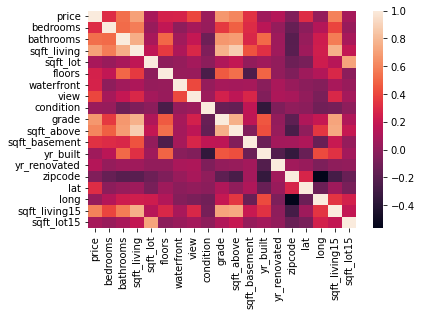

In [13]:
print(df.corr()['price'].sort_values())
sns.heatmap(df.corr())

In [14]:
pearson_coef, p_value = stats.pearsonr(df['sqft_living'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7020350546117989  with a P-value of P = 0.0


<AxesSubplot:xlabel='waterfront', ylabel='price'>

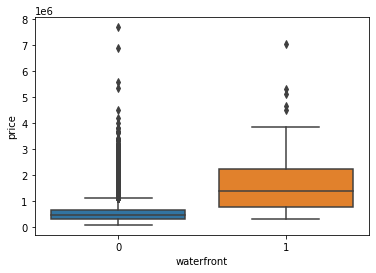

In [15]:
sns.boxplot(x=df["waterfront"],y=df[ "price"])

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

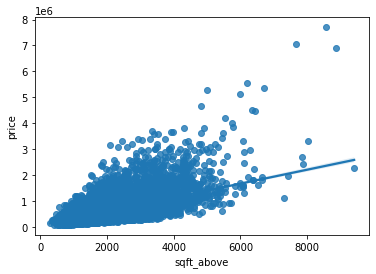

In [16]:
sns.regplot(x=df['sqft_above'],y=df["price"])

In [17]:
df['bedrooms'].value_counts().to_frame()

,bedrooms
3.00000,9824
4.00000,6882
2.00000,2760
5.00000,1601
6.00000,272
1.00000,199
7.00000,38
3.37287,13
8.00000,13
9.00000,6


In [18]:
grouped = df[['floors','grade','price']].groupby(['floors','grade'],as_index=False).mean()
grouped

,floors,grade,price
0,1.0,1,1.420000e+05
1,1.0,3,2.056667e+05
2,1.0,4,2.161870e+05
3,1.0,5,2.444255e+05
4,1.0,6,2.944114e+05
5,1.0,7,3.905749e+05
6,1.0,8,5.527914e+05
7,1.0,9,8.564284e+05
8,1.0,10,1.161105e+06
9,1.0,11,1.602596e+06


In [19]:
bins = np.linspace(min(df["price"]), max(df["price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['price-binned'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True )
df['price-binned'].value_counts().to_frame()

,price-binned
Low,21531
Medium,76
High,6


Text(0.5, 1.0, 'price bins')

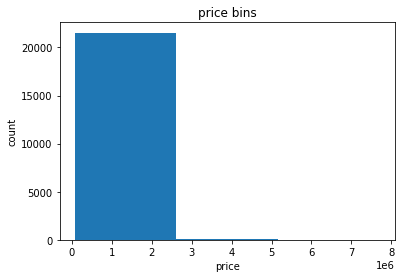

In [20]:
plt.hist(df["price"], bins = 3)

# set x/y labels and plot title
plt.xlabel("price")
plt.ylabel("count")
plt.title("price bins")

# Model Development


#### Single Input, Single Output Model

Linear Regression using only one feature. We have selected sqft_living, since it had the maximum correlation with the output.

In [21]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print("R2 score of the SISO model is:",lm.score(X, Y))

R2 score of the SISO model is: 0.4928532179037931


#### Multiple Input, Single Output

Linear regression model using all features:

In [22]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price-binned'],
      dtype='object')

In [23]:
X2=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y=df["price"]
lm2 = LinearRegression()
lm2.fit(X2,y)
print("R2 score of the MIMO model is:",lm2.score(X2, Y))

R2 score of the MIMO model is: 0.6997513873758985


Model has improved.

##### MIMO with selected features

Considering 0.25 treshold for correlation value, we choose the following features; and check the model score based on them.

In [24]:
X3=df[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'sqft_living15']]
y=df["price"]
lm3 = LinearRegression()
lm3.fit(X3,y)
print("R2 score of the MIMO model with selected features is:",lm3.score(X3, Y))

R2 score of the MIMO model with selected features is: 0.65769516660375


Not much difference.

##### MIMO with polynomial features
Let's create a pipeline to speed up the process.

In [25]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X2,y)
pipe.score(X2,y)

0.829538375178217

##### MIMO with polynomial features and ridge regression

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 4323
number of training samples: 17290


In [27]:
pr=PolynomialFeatures(degree=2, include_bias=False)
X_new=pr.fit_transform(x_train)
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(X_new,y_train)
RidgeModel.score(pr.fit_transform(x_test),y_test)

0.8421739888934323